# Project 3 - Data Visualization of Ford Go-Bike System
## by (Ebenezer Acquah)

Table of Content

- [Introduction](#intro)
-[Prelimary Investigation](#investigation)
- [Data Wrangling](#wrangling)
- [Feature Engineering](#engineering)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)

### <a id='intro'> Introduction</a>

> This dataset provides information about individual rides made in a bike-sharing system in the San Francisco Bay Area. The dataset has 183412 rows and 16 columns

### <a id='investigation'>Prelimary Investigation</a>

Import Libraries

In [67]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [68]:
# load in the dataset into a pandas dataframe

# load
df = pd.read_csv("/home/eben-success/Desktop/Local/Udacity/Udacity/Udacity_Data_Analysis_Projects/Project 3/201902-fordgobike-tripdata.csv")


In [69]:
df_copy = df.copy()

In [70]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [71]:
# check the number of rows and columns in the dataset
df.shape

(183412, 16)

In [72]:
# check tthe unique values in the target datasets (bike_share_for_all_trip)
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [74]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

From the summary above, there are 197 missing values in start_station_id, start_station_name, end_station_id, end_station_name and 8265 missing values in member_birth_year and member_gender.

In [75]:
df.duplicated().sum ()

0

## <a id ='wrangling'>Data Wrangling</a>

Checking for missing values 

In [76]:
# Find the percentage of missing values

(df.isna().sum() / df.shape[0]) * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

Fill missing values with the mode

In [77]:
for col in ['start_station_id', 'end_station_id', 'member_birth_year', 'member_gender' , 'end_station_name', 'start_station_name']:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df['member_gender'] = df['member_gender'].fillna("Male")

#### Investigations made so far

>- Most of the entries have incorrect datatypes
>- Some columns have missing data

## <a id='engineering'>Feature Engineering</a>

Correcting Datatypes

In [78]:
# convert start_time and end_time to datetime format
df.start_time = pd.to_datetime(df. start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert the start_station_id and end_stattion_id to strings
df.start_station_id = df.start_station_id.astype(str)

df.end_station_id = df.end_station_id.astype(str)

# convert the bike_id to string
df.bike_id = df.bike_id.astype(str)

# convert the user type and member_gender to categories
df.user_type = df.user_type.astype('category')

df.member_gender = df.member_gender.astype('category')

In [79]:
#checking to see if changes have been implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Fill the missing values with the mode

Recheck the percentage of missing values 

In [80]:
(df.isna().sum() / df.shape[0]) * 100

duration_sec               0.0
start_time                 0.0
end_time                   0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
bike_id                    0.0
user_type                  0.0
member_birth_year          0.0
member_gender              0.0
bike_share_for_all_trip    0.0
dtype: float64

I will convert the duration_secs in seconds to duration_mins in minutes so that it would look more friendly. 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [82]:
df['duration_min'] = (df['duration_sec'] / 60)
df['duration_min'] = df['duration_min'].astype(int)

# Dropping the duration_sec columns

df.drop(['duration_sec'], axis=1, inplace=True)


Since the member_birth_year is given, I would calculate the member's present age

In [83]:
df['member_age'] = 2021 - df['member_birth_year']

# converting member age from float to int

df['member_age'] = df['member_age'].astype(int)

df.drop(columns=['member_birth_year'], inplace=True)

In [84]:
df['member_age'].describe()

count    183412.000000
mean         36.049653
std           9.908290
min          20.000000
25%          29.000000
50%          33.000000
75%          40.000000
max         143.000000
Name: member_age, dtype: float64

From the description above, the maximum age is 143, which is abnormal, I will drop ages which exceeds 100.

In [85]:
# Checking for ages abover 100 years
abnormal_ages = df.query('member_age > 100')
print("The number of members with ages greater than 100 are  ", abnormal_ages.shape[0])

The number of members with ages greater than 100 are   75


From the above inspection, there are 75 people whose ages are greater than 100.

In [86]:
# Drop ages greater than 100 years

df = df[df['member_age'] < 100]

Reformat the date into minutes, hours, days and month in order to generate more insights 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183337 non-null  datetime64[ns]
 1   end_time                 183337 non-null  datetime64[ns]
 2   start_station_id         183337 non-null  object        
 3   start_station_name       183337 non-null  object        
 4   start_station_latitude   183337 non-null  float64       
 5   start_station_longitude  183337 non-null  float64       
 6   end_station_id           183337 non-null  object        
 7   end_station_name         183337 non-null  object        
 8   end_station_latitude     183337 non-null  float64       
 9   end_station_longitude    183337 non-null  float64       
 10  bike_id                  183337 non-null  object        
 11  user_type                183337 non-null  category      
 12  member_gender   

In [102]:
# Getting hours from start time
df['start_hour'] = df['start_time'] .dt.strftime('%H')

# Getting days from start time
df['start_day'] = df['start_time'] .dt.strftime('%A')

df['start_month'] = df['start_time'] .dt.strftime('%B')

In [103]:
df.start_month.unique()

array(['February'], dtype=object)

Based on the information above, all the trips were recored in February 2019

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183337 non-null  datetime64[ns]
 1   end_time                 183337 non-null  datetime64[ns]
 2   start_station_id         183337 non-null  object        
 3   start_station_name       183337 non-null  object        
 4   start_station_latitude   183337 non-null  float64       
 5   start_station_longitude  183337 non-null  float64       
 6   end_station_id           183337 non-null  object        
 7   end_station_name         183337 non-null  object        
 8   end_station_latitude     183337 non-null  float64       
 9   end_station_longitude    183337 non-null  float64       
 10  bike_id                  183337 non-null  object        
 11  user_type                183337 non-null  category      
 12  member_gender   

In [105]:
# Checking station

num_stations = df['start_station_name'].nunique()

print("There are ", num_stations, " stations in the dataset")

There are  329  stations in the dataset


In [61]:
df.shape

(183337, 20)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183337 non-null  datetime64[ns]
 1   end_time                 183337 non-null  datetime64[ns]
 2   start_station_id         183337 non-null  object        
 3   start_station_name       183337 non-null  object        
 4   start_station_latitude   183337 non-null  float64       
 5   start_station_longitude  183337 non-null  float64       
 6   end_station_id           183337 non-null  object        
 7   end_station_name         183337 non-null  object        
 8   end_station_latitude     183337 non-null  float64       
 9   end_station_longitude    183337 non-null  float64       
 10  bike_id                  183337 non-null  object        
 11  user_type                183337 non-null  category      
 12  member_gender   

### After the data wrangling, and feature engineering, 

>- There are 183337 rows and 19 columns in the dataset. <br><br>
>- start_station_id, end_station_id, bike_id have been converted from int to strings.<br><br>
>- The start_time has been broken into start_hour, start_day and start_month.<br><br>


## Univariate Exploratory Data Analysis

> In this session, I will explore  the duration_min, member's age and the start time from the dataset.

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

I willl start off with univariate distribution and visualize the relationship between variables.

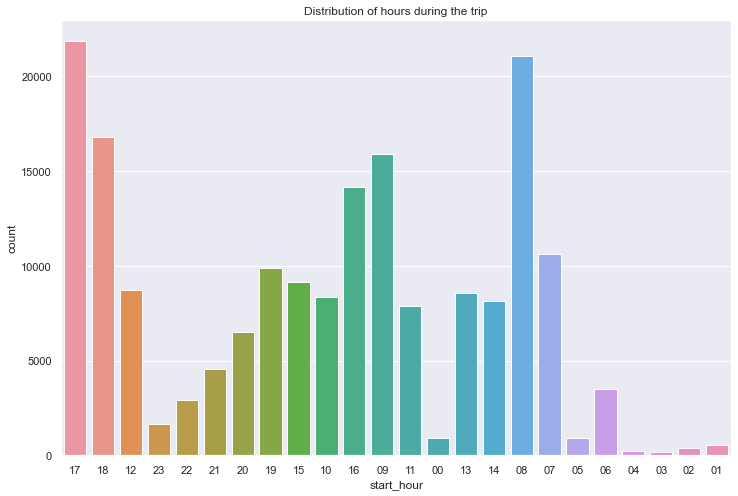

In [110]:
# Visualize hour of the day and it's respective trip

sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title("Distribution of hours during the trip")
sn.countplot(df['start_hour']);

The hours of 17, and 08 have the most bike rentals, with over 2000 trips.

Which day has the most trip

<AxesSubplot:title={'center':'Distribution of Day with the most Trip'}, xlabel='start_day', ylabel='count'>

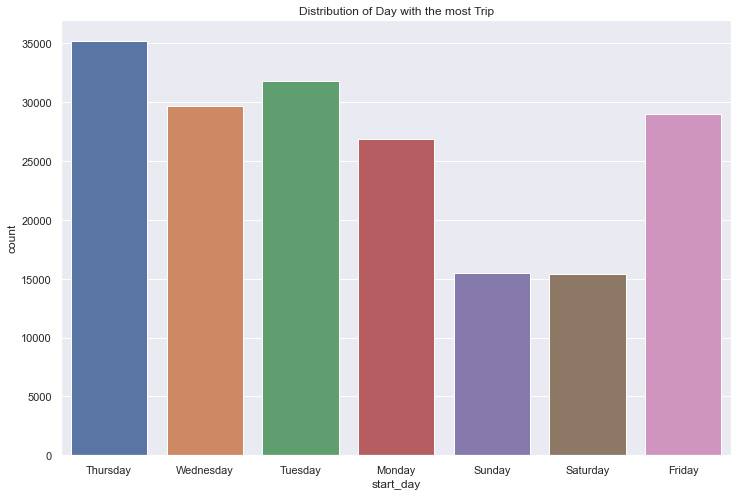

In [113]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title('Distribution of Day with the most Trip')
sn.countplot(df['start_day'])

From the chart above,  most people rented bikes on the Thursday. The total amount of bikes rented on the Thursday was 35000. This is followed by Tuesday, which amount a total of over 31000 rentals. On Friday,  a total amout of approximately 29000 rentals were made. The least of the rentals were made on Sunday and Saturday.

Which age group rented the most

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [109]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: line 1: Part_II_Filename: No such file or directory


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
